# Часть 1
### Cоздание массива данных

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%pylab inline
np.random.seed(123)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('dataset_4.xlsx')
df

,№,Name,Year,Age,Status,Legal Form,Ownership Form,Current Assets,Total Asstes,Retained Earnings,LT liabilities,ST liabilities,Total Liabilities,Revenue,TA turnover,Current Assets/TA,Retained Earnings/TA,LT liabilities/TA,ST liabilities/TA,Total liabilities/TA,Revenue/RA,StateOwnership,Partial,Private,SC,StateLegal,Agricultural,NonCom,Cooperative,LLC
0,1,"(ТУЛАТЕХМАШ), АО",19,29.0,1,0,0,192345000,228294000,-32949000,93533000,158381000,251914000,36594000,0.1425,0.842532,-0.144327,0.409704,0.693759,1.103463,0.160293,0,0,1,1,0,0,0,0,0
1,2,"18 ЦАРЗ, АО",19,11.5,1,0,2,79057000,507607000,-375469000,9007000,466916000,475923000,2173000,0.0041,0.346295,-1.644673,0.039454,2.045240,2.084693,0.009518,0,1,0,1,0,0,0,0,0
2,3,"39 АРСЕНАЛ, АО",19,26.5,1,0,1,209931000,286396000,-199177000,168000,456867000,457035000,44035000,0.1531,0.919564,-0.872458,0.000736,2.001222,2.001958,0.192887,1,0,0,1,0,0,0,0,0
3,4,"94 АРЗ, АО",19,25.5,1,0,1,10463000,233053000,-175760000,1195000,218191000,219386000,3757000,0.0166,0.045831,-0.769884,0.005234,0.955746,0.960980,0.016457,1,0,0,1,0,0,0,0,0
4,5,"АБСОЛЮТ, ООО",19,27.0,1,5,0,63009000,160632000,-78300000,6471000,206861000,213332000,2461000,0.0129,0.275999,-0.342979,0.028345,0.906117,0.934462,0.010780,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,19662,"4ФРЭШ, ООО",20,1.5,0,5,0,151849000,166295000,14723000,144000,151378000,151522000,771586000,5.3344,0.665147,0.064491,0.000631,0.663084,0.663714,3.379791,0,0,1,0,0,0,0,0,1
19662,19663,"(КОЛХОЗ) ИМЕНИ ШЕВЧЕНКО, СПК",20,28.0,0,2,0,222633000,472009000,363265000,75981000,8769000,84750000,311983000,0.7227,0.975203,1.591216,0.332821,0.038411,0.371232,1.366584,0,0,1,0,0,1,0,0,0
19663,19664,"ТЭС, АО",20,10.5,1,0,0,79877000,87991000,-21156000,1000,108074000,108075000,17238000,0.1468,0.349887,-0.092670,0.000004,0.473398,0.473403,0.075508,0,0,1,1,0,0,0,0,0
19664,19665,"СФЕРА УПАКОВКИ, ООО",20,5.0,1,5,0,168824000,168824000,4711000,2059000,161944000,164003000,121213000,0.6894,0.739503,0.020636,0.009019,0.709366,0.718385,0.530951,0,0,1,0,0,0,0,0,1


Удаляем пустые значения

In [4]:
df = df.dropna()

Удаляем целевую переменную из датасета

In [6]:
data = df.copy()
Y = data['Status']
data = data.drop(['Status'], axis=1)

In [7]:
Y.value_counts()

0    18234
1     1432
Name: Status, dtype: int64

Создаем числовой массив данных. Убираем текстовые и категориальные переменные.

In [8]:
data_num = data.copy()
data_num = data_num.drop(['№','Name', 'Legal Form', 'Ownership Form'], axis = 1)

Еще у нас в данных год закодирован двумя значениями: 19 и 20. Закодируем 0, если год 2019 и 1, если 2020

In [10]:
data_num['Year']= pd.get_dummies(data_num['Year'], prefix='Year')
data_num['Year'].value_counts()

0    18294
1     1372
Name: Year, dtype: int64

Создаем таблицу корреляций регрессоров с зависимой

In [11]:
corr_matr = data_num.corrwith(Y)

In [12]:
corr_matr = corr_matr.to_dict()
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])
tabl = tabl.sort_values(by=['value'])

Переменные, которые коррелируют с зависимой переменной с коэффом > 0.05

In [13]:
tabl[abs(tabl['value']) > 0.1]

,indicator,value
11,Retained Earnings/TA,-0.269905
4,Retained Earnings,-0.269905
18,Private,-0.109416
19,SC,0.119759
2,Current Assets,0.203612
10,Current Assets/TA,0.203612
5,LT liabilities,0.223799
12,LT liabilities/TA,0.223799
3,Total Asstes,0.230376
6,ST liabilities,0.290329


Создаем массив коэффициентов. Cols - весь массив данных за исключением неотнормированных на TA переменных и за исключением некоторых dummy (чтобы исключить мультиколлинеарность) 

In [14]:
cols = np.array(tabl.indicator)
cols_tabl = pd.DataFrame(cols)
cols_tabl

,0
0,Retained Earnings/TA
1,Retained Earnings
2,Private
3,Agricultural
4,Year
5,LLC
6,NonCom
7,Cooperative
8,TA turnover
9,Age


In [15]:
cols = np.delete(cols, [1, 2, 11, 13, 16, 18, 20, 21, 22, 23, 24])   
cols

array(['Retained Earnings/TA', 'Agricultural', 'Year', 'LLC', 'NonCom',
       'Cooperative', 'TA turnover', 'Age', 'Revenue/RA',
       'StateOwnership', 'Partial', 'SC', 'Current Assets/TA',
       'LT liabilities/TA'], dtype=object)

Корреляционная матрица коэффициентов:

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

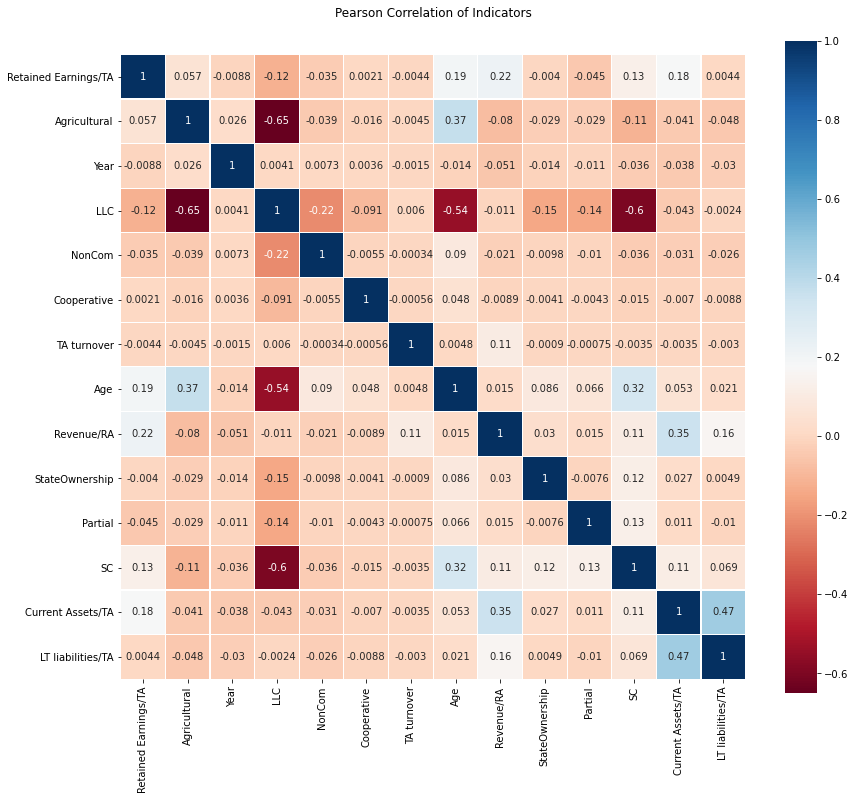

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Создаем датасет из списка, содержащего вышеперечисленные переменные

In [17]:
data_final = pd.DataFrame(data_num[cols], columns = cols)

# Часть 2
### Эконометрические модели

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Проведем тест VIF

Начнем с линейно-вероятностной модели. Прогоним на наших данных OLS

In [19]:
X = data_final.copy()

In [20]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


Retained Earnings/TA    1.302277
Agricultural            2.167627
Year                    1.079558
LLC                     3.440485
NonCom                  1.117938
Cooperative             1.024061
TA turnover             1.015214
Age                     5.654016
Revenue/RA              1.410992
StateOwnership          1.040321
Partial                 1.038421
SC                      1.995446
Current Assets/TA       1.620268
LT liabilities/TA       1.373669
dtype: float64

Тест гласит, что если VIF коэфф > 5, то данный регрессор значитеньно коррелирует с остальными регрессорами.
Такая проблема возникает только у возраста компании

In [21]:
import statsmodels.api as sm
import statsmodels
OLS_model = sm.OLS(Y,X, M=sm.robust.norms.HuberT())
result = OLS_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.237     
Dependent Variable:     Status           AIC:                         -1021.5395
Date:                   2021-03-26 14:20 BIC:                         -911.1265 
No. Observations:       19666            Log-Likelihood:              524.77    
Df Model:               14               F-statistic:                 437.7     
Df Residuals:           19652            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.238            Scale:                       0.055547  
----------------------------------------------------------------------------------
                         Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------------------
Retained Earnings/TA    -0.1474     0.0032   -46.3031   0.0000   -0.1536   -0.1411
Agricultural             0.0130     0.0076   

Тест Рамсея

In [22]:
print(statsmodels.stats.diagnostic.linear_reset(result))

<Wald test (chi2): statistic=[[767.30574049]], p-value=2.408105372203045e-167, df_denom=2>


Прогоняем логит на данных cols

In [23]:

Logit_model=sm.Logit(Y,X, M=sm.robust.norms.HuberT())
result_log=Logit_model.fit()
print(result_log.summary2())

Optimization terminated successfully.
         Current function value: 0.161720
         Iterations 11
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.380    
Dependent Variable:    Status            AIC:               6388.7631
Date:                  2021-03-26 14:21  BIC:               6499.1762
No. Observations:      19666             Log-Likelihood:    -3180.4  
Df Model:              13                LL-Null:           -5130.1  
Df Residuals:          19652             LLR p-value:       0.0000   
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        11.0000                                       
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Retained Earnings/TA -5.0237   0.1892 -26.5488 0.0000 -5.3946 -4.6528
Agricultural   

Точность логит модели (доля правильных ответов):

In [24]:
predictions_log = result_log.predict()
Y_pred_log =[]
for i in predictions_log:    
    if i < 0.5:         
        Y_pred_log.append(0)     
    else:         
        Y_pred_log.append(1)
score_log = np.mean(Y==Y_pred_log)
print(score_log)

0.9524051662768229


Корреляция Статуса и Предсказания для логит модели:

In [25]:
y = pd.DataFrame(Y)
y_pred_log = pd.DataFrame(Y_pred_log, columns = ['Prediction'])
logit = pd.concat([y, y_pred_log], axis = 1)

In [26]:
logit.corr()

,Status,Prediction
Status,1.00000,0.57544
Prediction,0.57544,1.00000


In [27]:
import statsmodels

Проведем тест Breusch-Pagan, проверив гетероскедастичность.

In [28]:
statsmodels.stats.diagnostic.het_breuschpagan(Y, X)

(4674.773155560791, 0.0, 437.7257397961684, 0.0)

Вывело массив размера 4. Расшифровка к коэффициентам: 

1) lm:
The lagrange multiplier statistic.

2) lm_pvalue:
The p-value of lagrange multiplier test.

3) f value:
The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test.

4) f_pvalue:
The p-value for the f-statistic.

То есть на уровне 1% нет Гетероскедастичности

Построим таблицу с названиями компаний, где столбец "статус" - то фактический статус

In [29]:
predictions = result_log.predict() 
predictions
df_1 = df[['Name', 'Status']]
df_2 = pd.DataFrame(predictions, columns = ['Bancrupt prob'])

df_predictions = pd.concat([df_1, df_2], axis = 1)
df_predictions.head(10)

,Name,Status,Bancrupt prob
0,"(ТУЛАТЕХМАШ), АО",1,0.640644
1,"18 ЦАРЗ, АО",1,0.999580
2,"39 АРСЕНАЛ, АО",1,0.984438
3,"94 АРЗ, АО",1,0.930411
4,"АБСОЛЮТ, ООО",1,0.484478
5,"АВАНГАРД, ООО",1,0.730189
6,"АВГУСТ, ООО",1,0.203824
7,"АВИСТА, ООО",1,0.091766
8,"АВС-КОМПЛЕКТ, ООО",1,0.105404
9,"АВТО-АГРО, ООО",1,0.874195


Чтобы было понятнее, что происходит, отсортируем массив по "вероятности банкротства"

In [30]:
df_predictions.sort_values(by=['Bancrupt prob'], ).head(10)

,Name,Status,Bancrupt prob
5413,"ГСВ, ООО",0,0.000000e+00
13033,"ФАНТАЗИЯ, ООО",0,4.380349e-38
17713,"ПЛЕМСЕРВИС, ООО НПФ",0,3.722395e-30
18850,"ПЕРЕКРЕСТОК20, ООО",0,3.722915e-28
4031,"БЬЮТИ ЛАЙФ, ООО",0,1.615552e-22
44,"АГРОХОЛДИНГ ЮРМА, ООО",1,9.020821e-22
16665,"РЕСУРС, ООО",0,1.725766e-21
18860,"ПАРИТЕТ, ООО",0,1.292827e-18
489,"КОРА-ТК, ООО",1,1.752131e-16
89,"АПК КОСМОДЕМЬЯНСКИЙ, АО",1,7.927417e-16


посчитаем точность прогнозов.

Тест Рамсея:

In [31]:
print(statsmodels.stats.diagnostic.linear_reset(result))

<Wald test (chi2): statistic=[[767.30574049]], p-value=2.408105372203045e-167, df_denom=2>


Прогоняем пробит на данных cols

In [32]:
Probit_model=sm.Probit(Y,data_final, M=sm.robust.norms.HuberT())
result_prob=Probit_model.fit()
print(result_prob.summary2())

         Current function value: 0.169425
         Iterations: 35
                           Results: Probit
Model:                 Probit            Pseudo R-squared:  0.351    
Dependent Variable:    Status            AIC:               6691.8073
Date:                  2021-03-26 14:22  BIC:               6802.2203
No. Observations:      19666             Log-Likelihood:    -3331.9  
Df Model:              13                LL-Null:           -5130.1  
Df Residuals:          19652             LLR p-value:       0.0000   
Converged:             0.0000            Scale:             1.0000   
No. Iterations:        35.0000                                       
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Retained Earnings/TA -2.1094   0.0486 -43.4134 0.0000 -2.2046 -2.0142
Agricultural         -1.9276   0.0998 -19.3235 0.00

/Users/dariagerasimenko/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Точность пробит модели (доля правильных ответов):

In [33]:
predictions_prob = result_prob.predict()
Y_pred_prob =[]
for i in predictions_prob:    
    if i < 0.5:         
        Y_pred_prob.append(0)
    else:         
        Y_pred_prob.append(1)
score_prob = np.mean(Y==Y_pred_prob)
print(score_prob, )

0.9489982711278349


Матрица корреляции Статуса с Предсказанием у пробит модели

In [34]:
y = pd.DataFrame(Y)
y_pred_prob = pd.DataFrame(Y_pred_prob, columns = ['Prediction'])
probit = pd.concat([y, y_pred_prob], axis = 1)

In [35]:
probit.corr()

,Status,Prediction
Status,1.00000,0.53589
Prediction,0.53589,1.00000


# Часть 3
### Модели машинного обучения

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X = data_final.copy()

Делим выборку случайным образом на тренировочную и тестовую. Это нужно, чтобы после обучения на тренировочной,
можно было тестировать точность модели на тестовой.

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify = Y, test_size = 0.3)

1) Прогоняем модели k ближайших соседей, смотрим на точность, выбираем наилучший k

In [39]:
train = []
test = []
NN = []

In [40]:
for k in [1, 3, 5, 10, 15, 25]:
    NN.append(k)
    y_predicted_test = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [41]:
tab = {'NN': NN, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['NN','Train', 'Test'])
tabl

,NN,Train,Test
0,1,1.000000,0.934915
1,3,0.963097,0.948136
2,5,0.954380,0.947288
3,10,0.945954,0.945424
4,15,0.944574,0.945424
5,25,0.941159,0.942712


Лучше выбрать 3 соседа

2) прогоняем модели: Случайный лес, Логит регрессию, Градиентный бустинг и КНН (k = 3)

In [41]:
import mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np   
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [42]:
X_tr = np.array(X_train)
y_tr = np.array(y_train)

In [43]:
train = []
test = []
model = []

In [44]:
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='ovr')
clf2 = RandomForestClassifier(random_state=1, n_estimators=55)
clf3 =  GradientBoostingClassifier(n_estimators=300)
clf4 = KNeighborsClassifier(n_neighbors = 3)
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN (k = 3)']
for clf, lab in zip([clf1, clf2, clf3, clf4],
                         labels):
    model.append(lab)
    y_predicted_test = clf.fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = clf.fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [45]:
tab = {'model': model, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['model','Train', 'Test'])
tabl

,model,Train,Test
0,Logistic Regression,0.949368,0.953051
1,Random Forest,0.999782,0.980508
2,Gradient Boosting,0.989757,0.977458
3,KNN (k = 3),0.963097,0.948136


Модели, кажется, предсказывают статус очень хорошо, но так как небанкротств значительно больше, чем банкротств,
возникает предположение, что модели хорошо предсказывают только небанкротсва. Посмотрим отдельно на предсказания
каждого из статусов

Это сделаем с помошью confusion matrix и classification report. 
Про confusion matrix читайте тут https://en.wikipedia.org/wiki/Confusion_matrix

Если коротко, то в этих матрицах 2х2 в клетках 11 и 22 верно предсказанные значения, в 12 - ошибочно предсказанные банкротства, в 21 - ошибочные небанкротства

In [46]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_train_pred = clf.predict(X_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train)) 

------------------------Logistic Regression------------------------
[[12708    56]
 [  641   361]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     12764
           1       0.87      0.36      0.51      1002

    accuracy                           0.95     13766
   macro avg       0.91      0.68      0.74     13766
weighted avg       0.95      0.95      0.94     13766

------------------------Random Forest------------------------
[[12764     0]
 [    3   999]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12764
           1       1.00      1.00      1.00      1002

    accuracy                           1.00     13766
   macro avg       1.00      1.00      1.00     13766
weighted avg       1.00      1.00      1.00     13766

------------------------Gradient Boosting------------------------
[[12764     0]
 [  141   861]]
              precision    recall  f1-score   support

  

На тренировочной выборке отлично работают модели Рандомный лес и Градиентный бустинг. Логит и КНН хорошо предсказывают
небанкротства, с банкротствами ошибаются

Проверим теперь на тестовой выборке

In [47]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_test_pred = clf.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test)) 

------------------------Logistic Regression------------------------
[[5447   23]
 [ 254  176]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5470
           1       0.88      0.41      0.56       430

    accuracy                           0.95      5900
   macro avg       0.92      0.70      0.77      5900
weighted avg       0.95      0.95      0.94      5900

------------------------Random Forest------------------------
[[5463    7]
 [ 108  322]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5470
           1       0.98      0.75      0.85       430

    accuracy                           0.98      5900
   macro avg       0.98      0.87      0.92      5900
weighted avg       0.98      0.98      0.98      5900

------------------------Gradient Boosting------------------------
[[5444   26]
 [ 107  323]]
              precision    recall  f1-score   support

           0  

Вывод тот же самый. У Рандомного леса и Градиентного бусинга никаких проблем. Эти модели - наилучшие. Рандомный лес предсказывает идеально.

Вывод: рандомный лес - лучшая модель

Проведем также кросс-валидацию. Это поможет нам узнать взвешенную точность, ведь у нас выборка несбалансированная
и точность очень сильно зависит от того, как разбиваются наши данные на train и test подвыборки

In [49]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [50]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print(lab,' Cross validation score:',np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
    #print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

Logistic Regression  Cross validation score: 0.9495127594534798
Random Forest  Cross validation score: 0.9803859819121445
Gradient Boosting  Cross validation score: 0.9787151036125046
KNN (k = 3)  Cross validation score: 0.9451538248805121


Рандомный лес все еще наилучший

посмотрим на веса переменных Рандомного леса:

In [51]:
coefs = clf2.fit(X_train, y_train).feature_importances_
cols

array(['Retained Earnings/TA', 'Agricultural', 'Year', 'LLC', 'NonCom',
       'Cooperative', 'TA turnover', 'Age', 'Revenue/RA',
       'StateOwnership', 'Partial', 'SC', 'Current Assets/TA',
       'LT liabilities/TA'], dtype=object)

In [52]:
weights = {'coef': cols, 'importance': coefs}
Weights = pd.DataFrame(weights, columns = ['coef', 'importance'])
Weights

,coef,importance
0,Retained Earnings/TA,0.554787
1,Agricultural,0.001638
2,Year,0.001429
3,LLC,0.002398
4,NonCom,0.000273
5,Cooperative,0.000046
6,TA turnover,0.151723
7,Age,0.033036
8,Revenue/RA,0.100189
9,StateOwnership,0.001242
